<a href="https://colab.research.google.com/github/MahdiTheGreat/AItools/blob/main/DAIS_Ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MahdiTheGreat/AItools.git
%cd AItools
%ls

Cloning into 'AItools'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 69.21 KiB | 17.30 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/AItools
Cities.zip  DAIS_Ass3.ipynb  README.md


In [2]:
!unzip "Cities.zip" -d "DAIS_Ass3"
%ls

Archive:  Cities.zip
  inflating: DAIS_Ass3/Chengdu_labeled.csv  
  inflating: DAIS_Ass3/Shenyang_labeled.csv  
  inflating: DAIS_Ass3/Beijing_labeled.csv  
  inflating: DAIS_Ass3/Guangzhou_labeled.csv  
  inflating: DAIS_Ass3/Shanghai_labeled.csv  
Cities.zip  DAIS_Ass3/  DAIS_Ass3.ipynb  README.md


In [3]:
import os

# Check the extracted folder structure
print(os.listdir("DAIS_Ass3"))


['Guangzhou_labeled.csv', 'Chengdu_labeled.csv', 'Shanghai_labeled.csv', 'Shenyang_labeled.csv', 'Beijing_labeled.csv']


Train and validate your system on the cities Beijing and Shenyang. Finally, evaluate your classifier separately on the cities Guangzhou and Shanghai.

In [4]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold

# Path to the extracted data folder
data_folder = "DAIS_Ass3"

# Corrected filenames
city_files = {
    "Beijing": "Beijing_labeled.csv",
    "Shenyang": "Shenyang_labeled.csv",
    "Guangzhou": "Guangzhou_labeled.csv",
    "Shanghai": "Shanghai_labeled.csv"
}

# Load data
city_data = {city: pd.read_csv(os.path.join(data_folder, filename)) for city, filename in city_files.items()}

# Extract relevant features and target variable
feature_columns = [col for col in city_data["Beijing"].columns if col != "PM_HIGH"]

# Create training and test sets
X = pd.concat([city_data["Beijing"][feature_columns], city_data["Shenyang"][feature_columns]])
Y = pd.concat([city_data["Beijing"]["PM_HIGH"], city_data["Shenyang"]["PM_HIGH"]])

X_test = pd.concat([city_data["Guangzhou"][feature_columns], city_data["Shanghai"][feature_columns]])
Y_test = pd.concat([city_data["Guangzhou"]["PM_HIGH"], city_data["Shanghai"]["PM_HIGH"]])

# Convert to NumPy arrays (if needed for scikit-learn)
X, Y = X.values, Y.values
X_test, Y_test = X_test.values, Y_test.values

Training data shape: (1939, 10)
Test data shape: (2703, 10)


In [13]:
from sklearn.cluster import KMeans #https://scikit-learn.org/stable/modules/clustering.html#k-means
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class Classifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clusters=1):
        self.n_clusters = n_clusters
        self.centroid_labels = {}

    def fit(self, X, Y):
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        # Step 1: Apply K-means clustering
        self.kmeans.fit(X)
        cluster_assignments = self.kmeans.labels_

        # Step 2: Assign a majority label to each centroid
        self.centroid_labels = {}  # Reset before training

        for cluster_id in range(self.n_clusters):
            # Get all training labels assigned to this cluster
            cluster_indices = np.where(cluster_assignments == cluster_id)[0]
            cluster_labels = Y[cluster_indices]

            # Find the majority label (0 or 1) in this cluster
            if len(cluster_labels) > 0:
                most_common_label = Counter(cluster_labels).most_common(1)[0][0]
                self.centroid_labels[cluster_id] = most_common_label

        print("Model trained with", self.n_clusters, "clusters.")


    def predict(self, X):
        """ Predicts labels for new data points based on the nearest cluster centroid. """
        # Step 1: Find the nearest cluster for each point
        cluster_assignments = self.kmeans.predict(X)

        # Step 2: Assign the label of the corresponding cluster
        predictions = np.array([self.centroid_labels[cluster] for cluster in cluster_assignments])

        return predictions

    def score(self, X, Y):
        """ Evaluates the accuracy of the classifier. """
        predictions = self.predict(X)  # Get model predictions
        accuracy = accuracy_score(Y, predictions)  # Compare with true labels
        return accuracy


# Create an instance of the classifier with a chosen number of clusters

parameters={
'n_clusters': list(range(1, 11))
}

grid_search = GridSearchCV(Classifier(), param_grid=parameters,
                             cv=StratifiedKFold(n_splits=10,shuffle=True),
                             scoring ='accuracy',
                             verbose=3,
                             return_train_score=True)

grid_search.fit(X=X,y=Y)

print("best parameters are: ",grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("the over all results are")
print(grid_search.cv_results_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Model trained with 1 clusters.
[CV 1/10] END .n_clusters=1;, score=(train=0.725, test=0.724) total time=   0.0s
Model trained with 1 clusters.
[CV 2/10] END .n_clusters=1;, score=(train=0.725, test=0.724) total time=   0.0s
Model trained with 1 clusters.
[CV 3/10] END .n_clusters=1;, score=(train=0.725, test=0.724) total time=   0.0s
Model trained with 1 clusters.
[CV 4/10] END .n_clusters=1;, score=(train=0.725, test=0.724) total time=   0.0s
Model trained with 1 clusters.
[CV 5/10] END .n_clusters=1;, score=(train=0.725, test=0.724) total time=   0.0s
Model trained with 1 clusters.
[CV 6/10] END .n_clusters=1;, score=(train=0.725, test=0.723) total time=   0.0s
Model trained with 1 clusters.
[CV 7/10] END .n_clusters=1;, score=(train=0.725, test=0.727) total time=   0.0s
Model trained with 1 clusters.
[CV 8/10] END .n_clusters=1;, score=(train=0.725, test=0.727) total time=   0.0s
Model trained with 1 clusters.
[CV 9/10] 

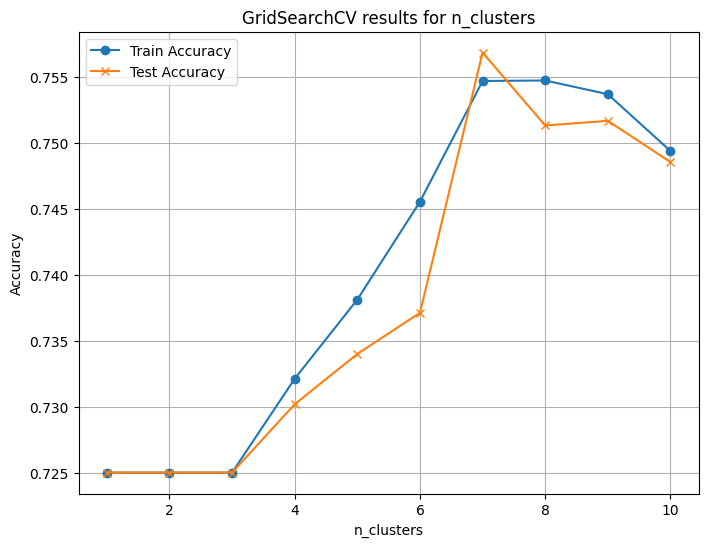

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_gridsearch_results(grid_search):
    # Extract the grid search results
    results = grid_search.cv_results_
    param_grid = grid_search.param_grid

    # Number of hyperparameters
    num_params = len(param_grid)

    # For 1 or 2 hyperparameters, plot the results
    if num_params <= 2:
        if num_params == 1:
            param_name = list(param_grid.keys())[0]
            param_values = results['param_' + param_name]

            train_scores = results['mean_train_score']
            test_scores = results['mean_test_score']

            # Plot the train and test accuracy for the single hyperparameter
            plt.figure(figsize=(8, 6))
            plt.plot(param_values, train_scores, label='Train Accuracy', marker='o')
            plt.plot(param_values, test_scores, label='Test Accuracy', marker='x')
            plt.title(f'GridSearchCV results for {param_name}')
            plt.xlabel(param_name)
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid(True)
            plt.show()

        elif num_params == 2:
            param_names = list(param_grid.keys())
            param_1_values = results['param_' + param_names[0]]
            param_2_values = results['param_' + param_names[1]]

            train_scores = results['mean_train_score']
            test_scores = results['mean_test_score']

            # Create a mesh grid for the hyperparameters
            param_1_grid, param_2_grid = np.meshgrid(np.unique(param_1_values), np.unique(param_2_values))

            # Reshape the scores to fit the mesh grid
            train_scores_grid = train_scores.reshape(len(np.unique(param_1_values)), len(np.unique(param_2_values)))
            test_scores_grid = test_scores.reshape(len(np.unique(param_1_values)), len(np.unique(param_2_values)))

            # Plot the heatmaps for train and test accuracy
            plt.figure(figsize=(8, 6))

            # Train accuracy heatmap
            plt.subplot(1, 2, 1)
            sns.heatmap(train_scores_grid, xticklabels=np.unique(param_2_values), yticklabels=np.unique(param_1_values),
                        cmap="YlGnBu", annot=True)
            plt.title('Train Accuracy')
            plt.xlabel(param_names[1])
            plt.ylabel(param_names[0])

            # Test accuracy heatmap
            plt.subplot(1, 2, 2)
            sns.heatmap(test_scores_grid, xticklabels=np.unique(param_2_values), yticklabels=np.unique(param_1_values),
                        cmap="YlGnBu", annot=True)
            plt.title('Test Accuracy')
            plt.xlabel(param_names[1])
            plt.ylabel(param_names[0])

            plt.tight_layout()
            plt.show()

    # For more than 2 hyperparameters, plot each one separately
    else:
        for param_name in param_grid.keys():
            param_values = results['param_' + param_name]

            train_scores = results['mean_train_score']
            test_scores = results['mean_test_score']

            # Plot results for each hyperparameter
            plt.figure(figsize=(8, 6))
            plt.plot(param_values, train_scores, label='Train Accuracy', marker='o')
            plt.plot(param_values, test_scores, label='Test Accuracy', marker='x')
            plt.title(f'GridSearchCV results for {param_name}')
            plt.xlabel(param_name)
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid(True)
            plt.show()


plot_gridsearch_results(grid_search)

In [18]:
C = grid_search.best_estimator_  # Get the model with the best parameters

# Predict on the test set (Guangzhou & Shanghai)
predictions = C.predict(X_test)
print("Predictions:", predictions)

# Calculate and print accuracy on both training and test sets
test_score = C.score(X_test, Y_test)

print(f"Test Accuracy: {test_score:.4f}")

Predictions: [0. 0. 0. ... 1. 1. 0.]
Test Accuracy: 0.8694
